# Regressao Linar

In [ ]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
#bibliotecas para implementacao de regressao linear
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
#importando arquivos
data = pd.read_csv('mt_cars.csv')

In [ ]:
#vizualizando formato dos dados
data.shape

(32, 12)

In [ ]:
#iniciando vizualizacao dos dados
data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
#iniciando tratamento de dados
#eliminando coluna Unnamed
data = data.drop(['Unnamed: 0'], axis=1)
#vizualizado nova distribuicao dos dados
data.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


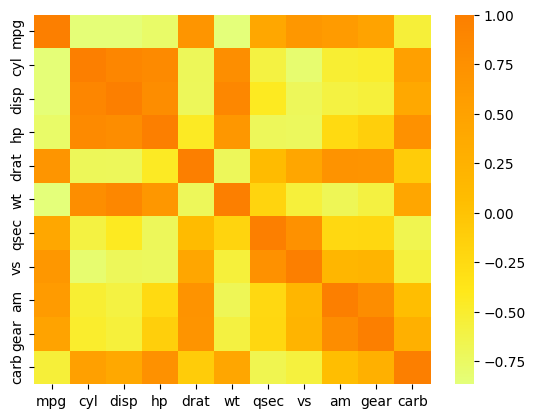

In [ ]:
#vizualizando grafico de correlacao
correlacao = data.corr()
sns.heatmap(correlacao, cmap='Wistia')
plt.show()

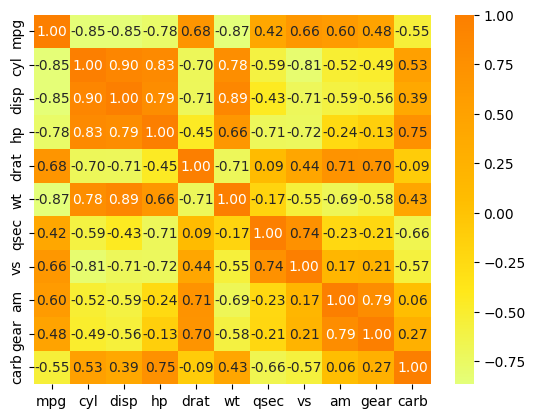

In [ ]:
#melhorando o correlograma para mais informacoes
correlacao = data.corr()
sns.heatmap(correlacao, cmap='Wistia',annot = True, fmt = '.2f') #vizualizacao dos valores
plt.show()

In [ ]:
#análise do grafico de dispersao
variaveis_correlacao = [('mpg','cyl'), ('mpg','disp'), ('mpg','hp'), ('mpg','wt'), ('mpg','drat'), ('mpg','vs')]
pares = len(variaveis_correlacao)
print(pares)

6


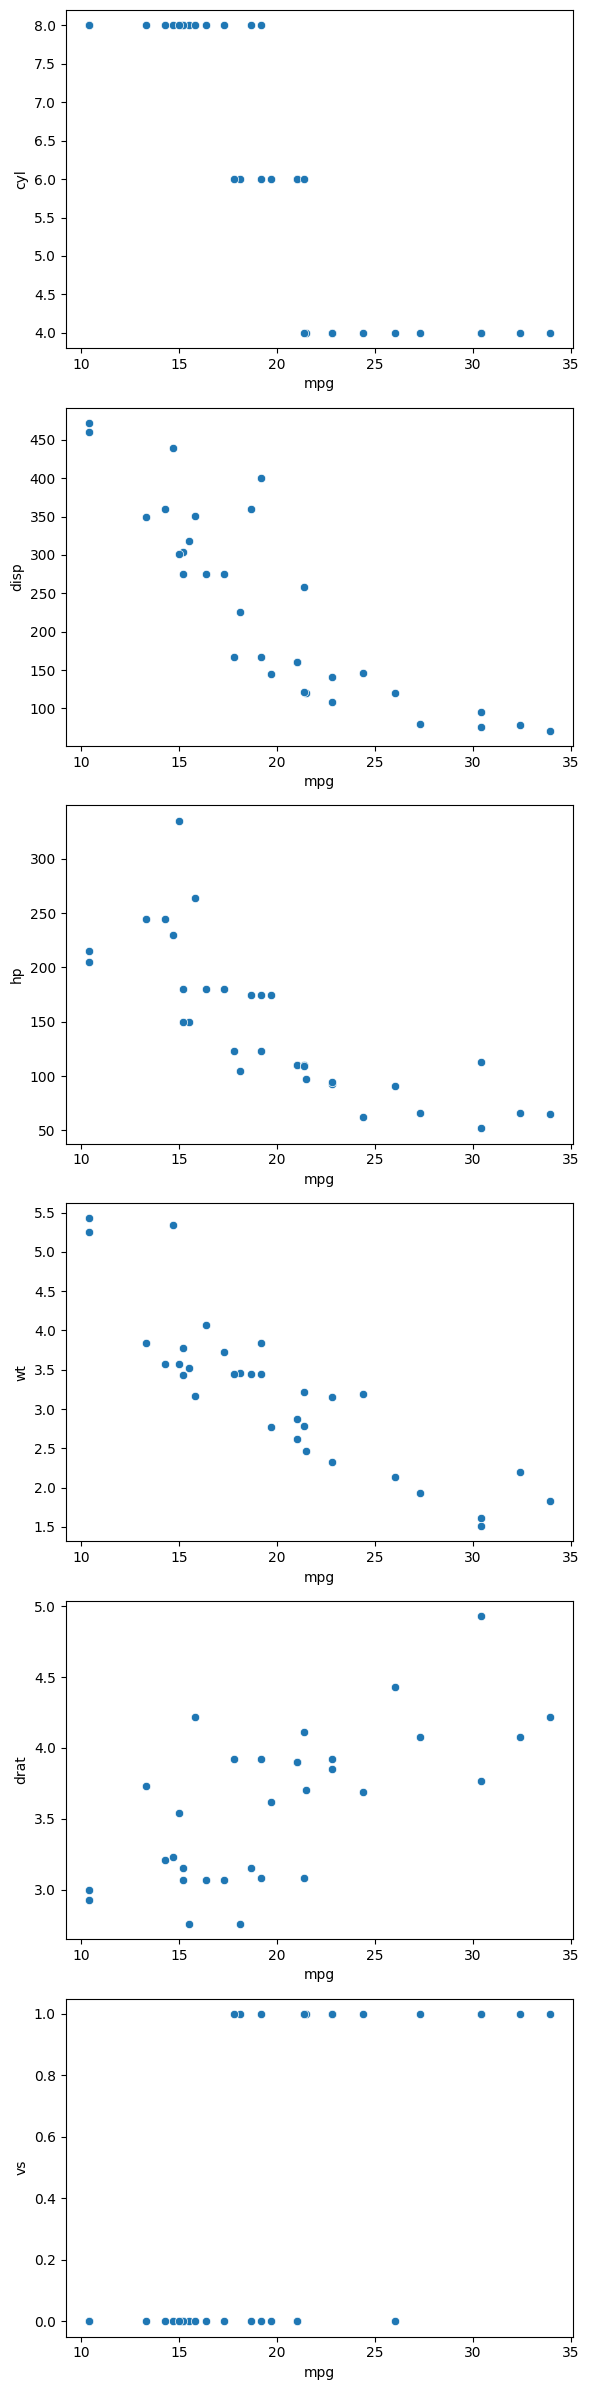

In [ ]:
#vizualizacao dos graficos de dispersao
fig, axes =  plt.subplots(nrows=pares, ncols=1, figsize=(pares,4*pares))
for i, par in enumerate(variaveis_correlacao):
  x_col , y_col = par
  sns.scatterplot(x=x_col, y=y_col, data=data, ax=axes[i])
plt.tight_layout()
plt.show()
#estudo dos candidatos para aplicarmos regressao linear

In [ ]:
#inicializacao do modelo de regressao linear
#vizualizacao de metricas e dadods estatisticos
model = smf.ols(formula='mpg ~ wt + disp + hp', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     44.57
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           8.65e-11
Time:                        17:38:33   Log-Likelihood:                -74.321
No. Observations:                  32   AIC:                             156.6
Df Residuals:                      28   BIC:                             162.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.1055      2.111     17.579      0.000      32.782      41.429
wt            -3.8009      1.066     -3.565      0.001      -5.985      -1.617
disp          -0.0009      0.010     -0.091      0.929      -0.022       0.020
hp            -0.0312      0.011     -2.724      0.011      -0.055      -0.008
==============================================================================
Omnibus:                        5.269   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.038
Skew:                           0.856   Prob(JB):                        0.133
Kurtosis:                       3.310   Cond. No.                     1.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

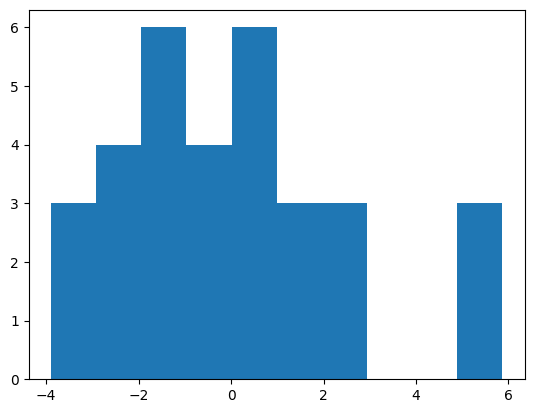

In [ ]:
#precisamos melhorar as metricas de AIC e BIC diminuindo eles
#iniciando vizualizacao de dados residuais
residuos = model.resid
plt.hist(residuos)
plt.show()

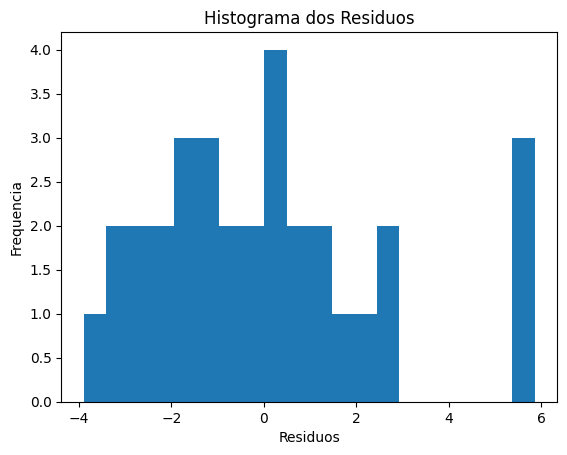

In [ ]:
#melhorando a visualizacao de residuos
plt.hist(residuos, bins = 20)
plt.xlabel("Residuos")
plt.ylabel("Frequencia")
plt.title("Histograma dos Residuos")
plt.show()

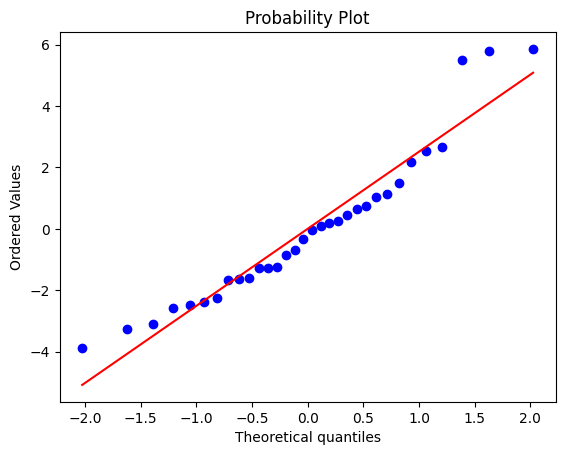

In [ ]:
#vizualizacao da reta na distribuicao de residuos
stats.probplot(residuos, plot=plt)
plt.show()

In [ ]:
#teste de hipotese usando Shapiro-Wilk
statts, pval = stats.shapiro(residuos)
print(f'Estatística do Shapiro-Wilk: {statts:.3f}')
print(f'P-valor do Shapiro-Wilk: {pval:.3f}')
# p <= 0.05 os dados nao estao normalmente distribuidos, rejeito a hipotese nula
# p >= 0.05 nao é possivel rejeitar a hipotese nula

Estatística do Shapiro-Wilk: 0.927
P-valor do Shapiro-Wilk: 0.033


In [ ]:
# teste com novas variaveis
model = smf.ols(formula='mpg ~ disp + cyl', data=data).fit()
model.summary()
# desempenho piorou

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     45.81
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           1.06e-09
Time:                        18:06:43   Log-Likelihood:                -79.573
No. Observations:                  32   AIC:                             165.1
Df Residuals:                      29   BIC:                             169.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.6610      2.547     13.609      0.000      29.452      39.870
disp          -0.0206      0.010     -2.007      0.054      -0.042       0.000
cyl           -1.5873      0.712     -2.230      0.034      -3.043      -0.131
==============================================================================
Omnibus:                        3.200   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.660
Skew:                           0.701   Prob(JB):                        0.264
Kurtosis:                       2.822   Cond. No.                     1.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

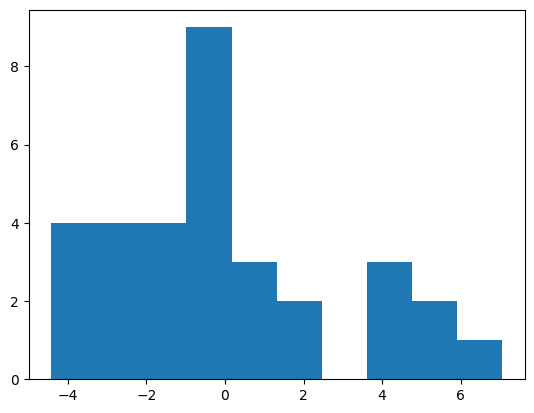

In [ ]:
residuos = model.resid
plt.hist(residuos)
plt.show()

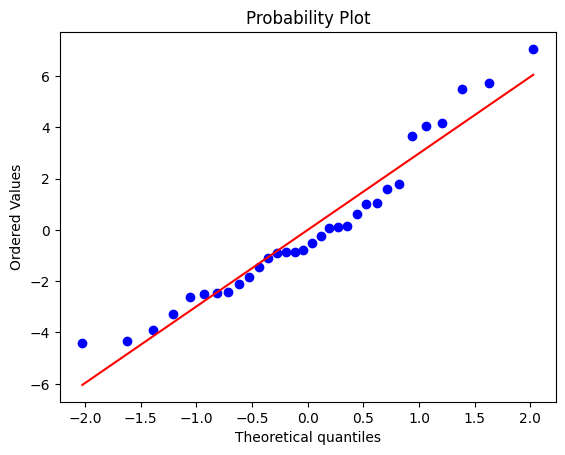

In [ ]:
stats.probplot(residuos, plot=plt)
plt.show()

In [ ]:
statts, pval = stats.shapiro(residuos)
print(f'Estatística do Shapiro-Wilk: {statts:.3f}')
print(f'P-valor do Shapiro-Wilk: {pval:.3f}')
# nao rejeitamos a hipotese nula, implica que normalmente os dados estao normalmente distribuidos

Estatística do Shapiro-Wilk: 0.942
P-valor do Shapiro-Wilk: 0.085


In [ ]:
#testes com novas variáveis
#vamos testando dados para conseguirmos um modelo com melhor desempenho
model = smf.ols(formula='mpg ~ drat + vs', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     24.53
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           5.82e-07
Time:                        18:12:19   Log-Likelihood:                -86.536
No. Observations:                  32   AIC:                             179.1
Df Residuals:                      29   BIC:                             183.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8253      4.903     -0.372      0.712     -11.853       8.202
drat           5.4365      1.421      3.826      0.001       2.530       8.343
vs             5.4013      1.507      3.583      0.001       2.318       8.484
==============================================================================
Omnibus:                        0.243   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.886   Jarque-Bera (JB):                0.440
Skew:                           0.059   Prob(JB):                        0.803
Kurtosis:                       2.438   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

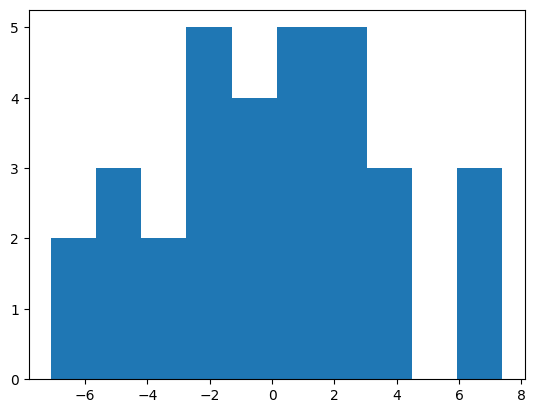

In [ ]:
residuos = model.resid
plt.hist(residuos)
plt.show()

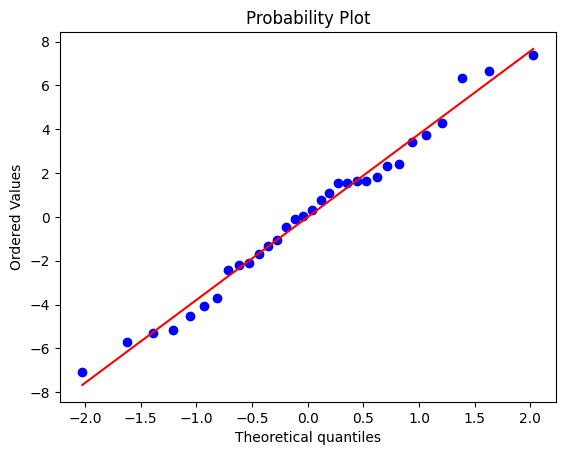

In [ ]:
stats.probplot(residuos, plot=plt)
plt.show()

In [ ]:
statts, pval = stats.shapiro(residuos)
print(f'Estatística do Shapiro-Wilk: {statts:.3f}')
print(f'P-valor do Shapiro-Wilk: {pval:.3f}')
#implica na análise de que os dados estao bem distribuidos

Estatística do Shapiro-Wilk: 0.981
P-valor do Shapiro-Wilk: 0.822
